# Spatial analyses

## Loading data

In [4]:
##Loading libraries

import scimap as sm
import scanpy as sc
import seaborn as sns; sns.set(color_codes=True)
import anndata as ad
import pandas as pd
import numpy as np
from sklearn.neighbors import BallTree
from joblib import Parallel, delayed
import scipy
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import multiprocessing as mp
import seaborn as sns
from bokeh.plotting import figure, output_file, show 
from bokeh.palettes import Category10, Category20, Category20b, Category20
import umap as um
import os

Running SCIMAP  2.3.5


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\mpl_scatter_density\__init__.py:4: UserWarning:

pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



In [2]:
# Version of scimap
print("scimap version:", sm.__version__)

scimap version: 2.3.5


In [ ]:
##Directories
#dir_in = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_data = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/"
#dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"
#dir_out_calculations = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/neigh_graph_matrix/"

In [3]:
# Directories in Windows
dir_in = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_data = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval"
dir_out_plots = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval"
dir_out_calculations = r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\neigh_graph_matrix\test_marval"

In [4]:
# Show files in directory
print("Files in input directory:", os.listdir(dir_in))
print("Files in output data directory:", os.listdir(dir_out_data))
print("Files in output plots directory:", os.listdir(dir_out_plots))
print("Files in output calculations directory:", os.listdir(dir_out_calculations))

Files in input directory: ['RCN.h5ad']
Files in output data directory: ['RCN.h5ad']
Files in output plots directory: []
Files in output calculations directory: []


In [5]:
#Load data
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\RCN.h5ad")
#adata= sc.read("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")
#adata = pd.read_csv("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_metadata_annotation/csv/aggregated_data.csv")

In [13]:
# Show adata info
print(adata)  # Print the AnnData object summary

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers'
    layers: 'log'


In [ ]:
# Show first few rows of adata
print(adata.obs.head())

                 X_centroid    Y_centroid  Area  MajorAxisLength  \
FAHNSCC_11A_1  11185.516060   8365.693790   467        25.867368   
FAHNSCC_11A_2   7186.449627  11327.268657   536        28.405857   
FAHNSCC_11A_3   3499.581356   3682.459322   590        29.941527   
FAHNSCC_11A_4  10631.809035   7499.527721   487        27.899300   
FAHNSCC_11A_5  14293.819923   4602.793103   522        28.274016   

               MinorAxisLength  Eccentricity  Solidity    Extent  Orientation  \
FAHNSCC_11A_1        23.026569      0.455612  0.964876  0.778333    -0.764107   
FAHNSCC_11A_2        24.052832      0.531981  0.972777  0.797619    -0.343483   
FAHNSCC_11A_3        25.243419      0.537772  0.965630  0.786667     1.562485   
FAHNSCC_11A_4        22.451737      0.593625  0.964356  0.724702    -0.251315   
FAHNSCC_11A_5        23.590147      0.551250  0.970260  0.773333    -0.884296   

                    Sample  ... Desmoplastic category   tim3   pd_l1   pd_1  \
FAHNSCC_11A_1  FAHNSCC_11

In [ ]:
# Export updated AnnData to CSV
sm.hl.scimap_to_csv(adata, output_dir=dir_out_data, file_name="RCN_updated", CellID='CellID', verbose=True, layer=None)

## Format data from csv to adata (if needed)

In [ ]:
# Format anndata for Squidpy (if needed)
df = pd.read_csv(dir_in)
# Delimit markers
marker_cols = df.columns[1:31]  # columnas 2 a 31
X = df[marker_cols].to_numpy()

# Metadata
meta_cols = df.columns[[0]]  # CellID
meta_cols = meta_cols.append(df.columns[33:])  # columnas 34 en adelante
obs = df[meta_cols]

# Create anndata
adata = ad(X=X, obs=obs)

#Set sample ID as categorical (needed)
for col in adata.obs.columns:
    adata.obs[col] = adata.obs[col].astype('category')

# Set spatial coordinates
adata.obsm["spatial"] = df.iloc[:, 31:33].to_numpy()

#ADDING METADATA BASED ON COLUMNS FROM XLSX
meta_df = pd.read_excel("/Volumes/Projects/t-CycIF/t-CycIF_human/Experiment/clinical_metadata.xlsx")
meta_df = meta_df.set_index("Sample")
for col in meta_df.columns:
    # Usamos map para asignar el valor correcto a cada célula
    adata.obs[col] = adata.obs['Sample'].map(meta_df[col])

#adata.write(dir_out_data + "aggregate_data_sp.h5ad")

In [ ]:
#With scimap function
# Construct the path to the CSV file
import os
csv_file = os.path.join(dir_in, "RCN_updated.csv")
# Convert CSV to AnnData
adata = sm.pp.mcmicro_to_scimap(csv_file, remove_dna=True, remove_string_from_name=None, log=False, drop_markers=None,
                            random_sample=None, unique_CellId=True, CellId='CellID', split='X_centroid',
                            custom_imageid=None, min_cells=None, output_dir=None)

Loading RCN_updated.csv


c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scimap\preprocessing\mcmicro_to_scimap.py:106: DtypeWarning:

Columns (51,53,54,56,57,60) have mixed types. Specify dtype option on import or set low_memory=False.



In [30]:
# Show available samples
print(adata.obs['epithelium'].unique())

['epithelium' 'Unknown']


In [ ]:
#Where does carcinoma come from?
sm.tl.foldchange(carcinoma, from_group = ["AGSCC_1","AGSCC_2", "VHNSCC_01","HNSCC_4"], 
                 to_group=['FAAGSCC_9', 'FAAGSCC_13', 'FAHNSCC_11A','FAHNSCC_11B', 'FAHNSCC_11C', 'FAHNSCC_14', 'FAHNSCC_15', 'FAHNSCC_6'], 
                 imageid='Sample', phenotype='phenotype', normalize=True, 
                 subset_phenotype=None, label='foldchange_FA', verbose=True)

sm.pl.foldchange(carcinoma, label='foldchange_FA', p_val=0.05, nonsig_color='grey', subset_xaxis=None, 
                 subset_yaxis=None, log=True, center=0, method='heatmap', parallel_coordinates_color=None, 
                 matplotlib_bbox_to_anchor=(1.04, 1), 
                 matplotlib_legend_loc='upper left', xticks_rotation=90, return_data=False, )

## Identifying recurrent colocalization

In [ ]:
# Spatial interaction analysis
# Why choose knn, knn=30, permutation=100?
sm.tl.spatial_interaction(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',phenotype='phenotype', 
                          method = 'knn', knn=30, permutation=100, imageid='imageid', pval_method='zscore', 
                          verbose=True, label ='spatial_interaction')

Processing Image: ['FAHNSCC_11A']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11B']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_11C']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_14']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_15']
Identifying the 30 nearest neighbours for every cell
Mapping phenotype to neighbors
Performing 100 permutations
Consolidating the permutation results
Processing Image: ['FAHNSCC_6']
Identifying the 30 nearest neighbours for every ce

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_interaction'
    layers: 'log'

c:\Users\jhona\miniconda3\envs\scimap\lib\site-packages\scipy\stats\_stats_py.py:9694: RuntimeWarning:

divide by zero encountered in log



Saved network plot to \\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\09_Plots_and_figures\Plots_2025\RCN_discovery\radius_spatial_count_leiden\test_marval\spatialInteractionNetwork.pdf


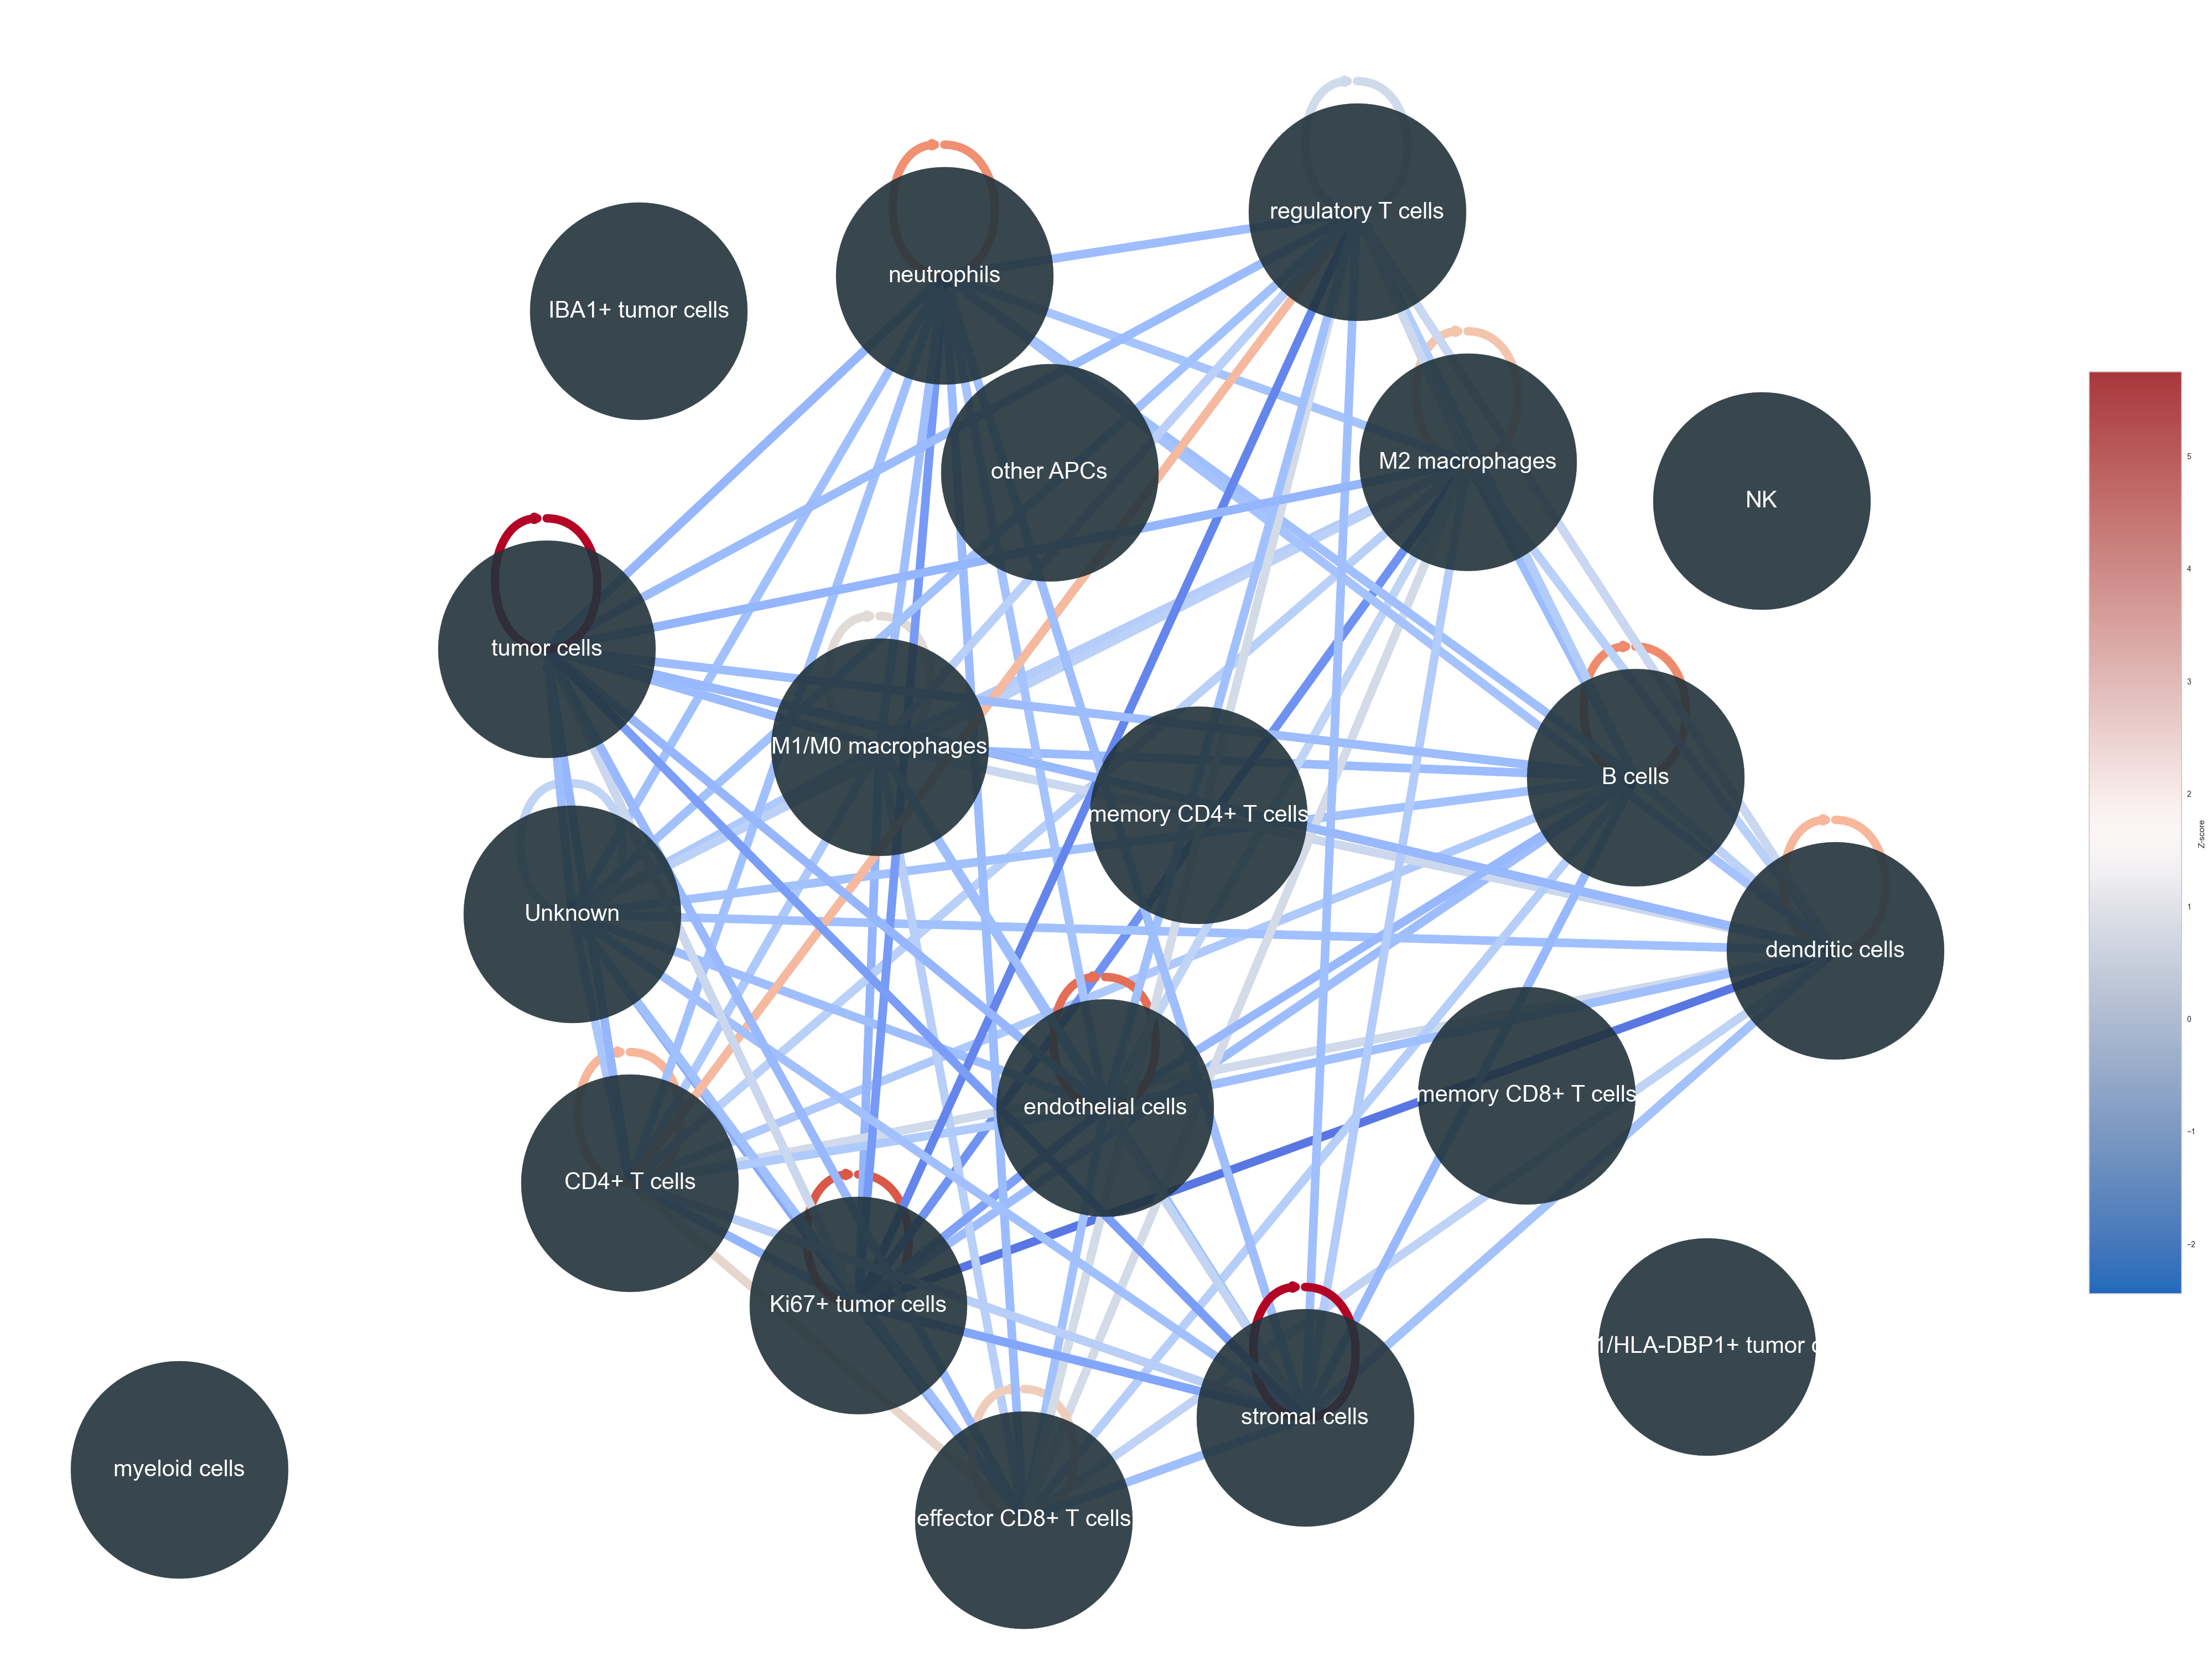

In [ ]:
# Graph plot for spatial interaction cell types
sm.pl.spatialInteractionNetwork(adata, spatial_interaction='spatial_interaction', p_val=0.05, cmap='vlag', 
                          nodeColor='#22333b', nodeSize=80000, alpha=0.9, figsize=(40,30), fontSize=30, 
                          fontColor='white', subsetPhenotype=None, fileName='spatialInteractionNetwork.pdf', saveDir=dir_out_plots)

## Identifying local cell clusters (neighborhoods)

### Building neighborhood graph 
### Select method: radius (physical proximity) or knn (neareast neighbors)

In [22]:
#For radius
filtration = [45, 75, 150]
for radius in filtration:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='radius', radius=radius,
                            subset=None, label='spatial_count_' + str(radius))
    kclust = adata.uns['spatial_count_' + str(radius)]
    kclust.to_csv(dir_out_calculations + "spatial_count_" + str(radius) + ".csv")

Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours within 45 pixels of every cell
Identifying neighbours withi

In [23]:
#For knn
neighbors = [10, 20, 30]
for knn in neighbors:
    adata = sm.tl.spatial_count(adata, x_coordinate="X_centroid", y_coordinate='Y_centroid',
                            phenotype='FinalPhenotype', method='knn', knn=knn,
                            subset=None, label='spatial_count_knn_' + str(knn))
    kclust = adata.uns['spatial_count_knn_' + str(knn)]
    kclust.to_csv(dir_out_calculations + "spatial_count_knn_" + str(knn) + ".csv")

Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for every cell
Identifying the 10 nearest neighbours for ever

In [31]:
#Save adata as h5ad with scimap updates
adata.write(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
#adata.write("/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/06_RCN/csv/updated/RCN.h5ad")

### Cluster graph into RCNs

In [ ]:
adata = sm.tl.spatial_cluster(
                adata,
                resolution=1,
                nearest_neighbors=20,
                n_pcs= 10,
                method='leiden',
                df_name='spatial_count_45',
                random_state=42,
                label='spatial_count_cluster_45'
            )

In [ ]:
adata = sm.tl.spatial_cluster(
                adata,
                resolution=1,
                nearest_neighbors=20,
                method='knn',
                df_name='spatial_count_45',
                random_state=42,
                label='spatial_count_cluster_45'
            )

In [ ]:
# Define your parameter lists
filtration = [45, 75, 150]
resolution = [0.3,0.5,0.8]
nn = [10, 20, 30]

# Output folder for the plots
dir_out_plots = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/09_Plots_and_figures/Plots_2025/RCN_discovery/radius_spatial_count_leiden/"

# Make sure the folder exists
os.makedirs(dir_out_plots, exist_ok=True)

for radius in filtration:
    for res in resolution:
        for neighbor in nn:
            # Perform spatial clustering
            adata = sm.tl.spatial_cluster(
                adata,
                resolution=res,
                nearest_neighbors=neighbor,
                method='leiden',
                df_name='spatial_count_' + str(radius),
                random_state=42,
                label='spatial_count_cluster_' + str(radius)
            )

            # Create filename based on parameters
            plot_filename = f"stackedbar_radius{radius}_res{res}_nn{neighbor}.png"
            plot_path = os.path.join(dir_out_plots, plot_filename)

            # Generate and save the plot in high resolution
            sm.pl.stacked_barplot(
                adata,
                x_axis='RCN',
                y_axis='FinalPhenotype',
                save=plot_path,
                dpi=600  # high-quality output
            )

            print(f"Plot saved: {plot_path}")


In [ ]:
km = KMeans(random_state=42)
visualizer2 = KElbowVisualizer(km, k=(2,55), timings=False, metric='distortion', locate_elbow=False)
visualizer2.fit(adata.uns['spatial_count'].fillna(0))        # Fit the data to the visualizer
visualizer2.show()  

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='RCN', y_axis='FinalPhenotype')

**Why these values? If it is based on criteria, can something more robust be done? We need tools to determine the number of idea clusters (if that exists) and the optimal number of neighbors to avoid over- and under-representation in the analyses.**

We need make a subset of the data for run tools no to take dessicions

In [5]:
#Load data")
adata = sc.read(r"\\NAS_BMF_LAB\Projects\t-CycIF\t-CycIF_human\08_Results\Datasets\08_RCN\csv\updated\test_marval\scimap_RCN.h5ad")
# Show adata info
print(adata)

AnnData object with n_obs × n_vars = 12415074 × 30
    obs: 'X_centroid', 'Y_centroid', 'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'Solidity', 'Extent', 'Orientation', 'Sample', 'Condition', 'Replicate', 'phenotype', 'FinalPhenotype', 'GlobalCellType', 'Batch', 'Group', 'Tumor type', 'Same patient', 'Tumor site', 'Tumor stage', 'Age at tumor', 'FA gene', 'Smoking', 'Gender', 'BMT', 'VPH status', 'Patient status', 'Desmoplastic grade', 'Desmoplastic category', 'tim3', 'pd_l1', 'pd_1', 'p_s6', 'ki67', 'gh2ax', 'epithelium', 'CellID', 'imageid'
    uns: 'all_markers', 'spatial_count_150', 'spatial_count_45', 'spatial_count_75', 'spatial_count_knn_10', 'spatial_count_knn_20', 'spatial_count_knn_30', 'spatial_interaction'
    layers: 'log'


In [7]:
# Data subset for testing
np.random.seed(42)

sub_idx = []

for sample in adata.obs["Sample"].unique():
    idx = adata.obs.index[adata.obs["Sample"] == sample]
    
    # Si la muestra tiene menos de 100000 toma todas
    n = min(100000,len(idx))
    
    chosen = np.random.choice(idx, size=n, replace=False)
    sub_idx.extend(chosen)

adata_sub = adata[sub_idx, :].copy()


In [8]:
# Imports for clustering evaluation
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


**Selection of PCs**

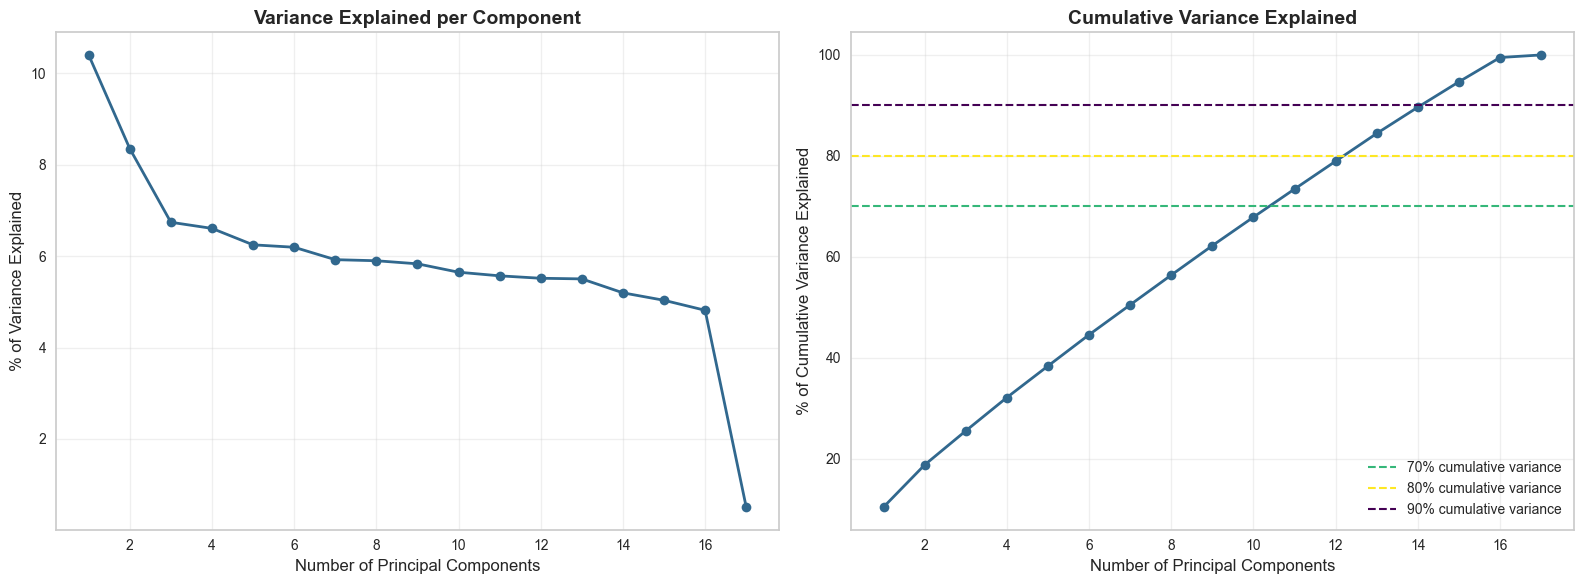

In [27]:
# Extract spatial count data
X = adata_sub.uns["spatial_count_45"].copy()
# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Run PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_ * 100
cumulative_variance = np.cumsum(explained_variance)

# Create two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Individual variance explained per component
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='#31688e', linewidth=2)
ax1.set_xlabel("Number of Principal Components", fontsize=12)
ax1.set_ylabel("% of Variance Explained", fontsize=12)
ax1.set_title("Variance Explained per Component", fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Plot 2: Cumulative variance explained
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='#31688e', linewidth=2)
ax2.axhline(70, color='#35b779', linestyle='--', label="70% cumulative variance", linewidth=1.5)
ax2.axhline(80, color='#fde724', linestyle='--', label="80% cumulative variance", linewidth=1.5)
ax2.axhline(90, color='#440154', linestyle='--', label="90% cumulative variance", linewidth=1.5)
ax2.set_xlabel("Number of Principal Components", fontsize=12)
ax2.set_ylabel("% of Cumulative Variance Explained", fontsize=12)
ax2.set_title("Cumulative Variance Explained", fontsize=14, fontweight='bold')
ax2.grid(True, alpha=0.3)
ax2.legend(fontsize=10)

plt.tight_layout()
plt.show()



In [21]:
# Variance table
df_variance = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Varianza (%)": explained_variance,
    "Varianza acumulada (%)": cumulative_variance
})

display(df_variance.head(20))

,PC,Varianza (%),Varianza acumulada (%)
0,PC1,10.403605,10.403605
1,PC2,8.354521,18.758127
2,PC3,6.741697,25.499824
3,PC4,6.607786,32.107610
4,PC5,6.247940,38.355550
5,PC6,6.195172,44.550722
6,PC7,5.923325,50.474047
7,PC8,5.899651,56.373698
8,PC9,5.832552,62.206250
9,PC10,5.648805,67.855055


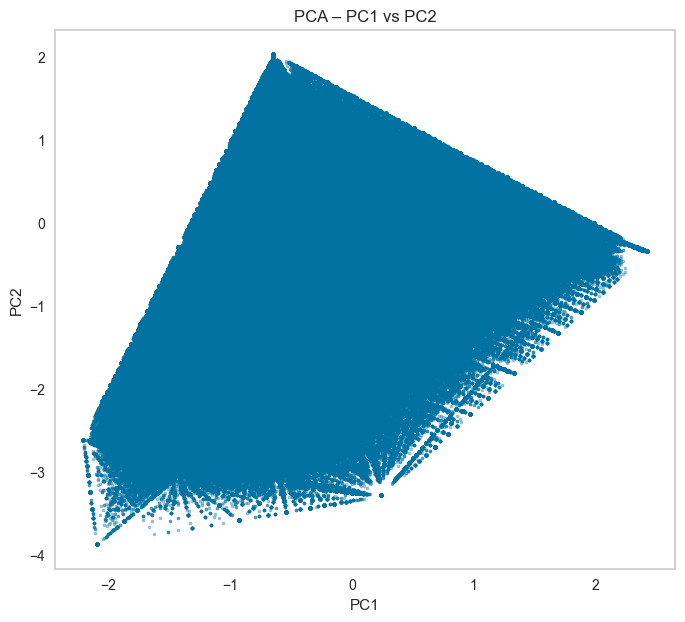

In [22]:
# Plot PCA
pca_df = pd.DataFrame(
    X_pca[:, :2],
    columns=['PC1', 'PC2'],
    index=X.index
)

plt.figure(figsize=(8, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'], s=5, alpha=0.4)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – PC1 vs PC2")
plt.grid()
plt.show()

In [23]:
# Loadings matrix
loadings = pd.DataFrame(
    pca.components_,
    columns=X.columns,
    index=[f"PC{i+1}" for i in range(pca.n_components_)]
)

print("\nPCA Loadings Matrix:")
display(loadings)


PCA Loadings Matrix:


,B cells,CD4+ T cells,Ki67+ tumor cells,M1/M0 macrophages,M2 macrophages,NK,Other,dendritic cells,effector CD8+ T cells,endothelial cells,neutrophils,other APCs,regulatory T cells,stromal cells,tumor cells,IBA1+ tumor cells,IBA1/HLA-DBP1+ tumor cells
PC1,-0.175793,-0.246465,0.487616,-0.073134,-0.178694,-0.103262,-0.011431,-0.132983,-0.226846,-0.174087,-0.039806,-0.082152,-0.277187,-0.283565,0.597631,0.002277,0.017774
PC2,-0.253398,-0.106476,-0.107875,-0.135339,-0.048075,-0.180062,0.022734,-0.201204,-0.441294,0.244549,-0.028603,-0.085421,-0.317272,0.627690,-0.095251,-0.228851,0.002151
PC3,-0.222007,-0.209251,-0.082685,-0.069187,0.341055,0.338110,-0.100226,-0.420350,0.251154,0.221893,0.094310,-0.335654,-0.186353,-0.045283,-0.018284,0.453425,0.036719
PC4,-0.390127,-0.462110,0.010750,0.470907,0.307475,0.104289,0.142367,0.344459,-0.062191,-0.063967,0.137737,0.368142,-0.038378,0.039147,-0.049193,0.006169,0.011248
PC5,0.091298,0.011413,-0.103162,-0.173177,-0.002981,-0.228324,-0.138509,0.038294,-0.170057,0.450286,0.680573,0.240914,-0.098809,-0.339140,-0.001423,0.018905,-0.008704
PC6,0.086692,0.039579,0.133433,0.214729,0.326891,-0.050091,0.041665,-0.033281,-0.017307,0.568649,-0.453498,-0.082396,-0.046808,-0.330606,-0.019347,-0.405025,0.052659
PC7,0.027292,0.028880,-0.037634,0.086428,-0.054598,0.013138,-0.056634,-0.020052,-0.051881,-0.084767,0.065029,-0.046441,-0.023733,-0.021024,-0.054812,-0.037960,0.980336
PC8,0.147223,0.110851,-0.020630,0.066257,0.111283,-0.091609,0.897178,-0.211866,-0.056154,-0.111730,0.196619,-0.116207,-0.110640,-0.088623,-0.048845,0.018412,0.003147
PC9,-0.188604,0.422571,0.025023,0.278595,0.470079,-0.269063,-0.287892,-0.129030,-0.207535,-0.348880,0.219826,-0.269350,0.083817,-0.043897,0.010701,-0.107998,-0.091270
PC10,-0.102214,0.174118,0.076210,-0.481930,0.310692,0.526446,0.032361,-0.138984,-0.096941,-0.179277,0.038916,0.384423,0.003820,-0.045427,0.021160,-0.364203,0.033601


In [28]:
# Extract top positive and negative loadings for each PC
pc_top_loadings = []

for pc in loadings.index:
    pc_loadings = loadings.loc[pc].sort_values(ascending=False)
    
    # Get top positive and negative
    top_positive = pc_loadings.index[0]
    top_positive_value = pc_loadings.values[0]
    
    top_negative = pc_loadings.index[-1]
    top_negative_value = pc_loadings.values[-1]
    
    pc_top_loadings.append({
        'PC': pc,
        'Top Positive Feature': top_positive,
        'Positive Loading': round(top_positive_value, 4),
        'Top Negative Feature': top_negative,
        'Negative Loading': round(top_negative_value, 4)
    })

# Create DataFrame
df_top_loadings = pd.DataFrame(pc_top_loadings)

print("Top Positive and Negative Loadings per Principal Component:")
display(df_top_loadings)

Top Positive and Negative Loadings per Principal Component:


,PC,Top Positive Feature,Positive Loading,Top Negative Feature,Negative Loading
0,PC1,tumor cells,0.5976,stromal cells,-0.2836
1,PC2,stromal cells,0.6277,effector CD8+ T cells,-0.4413
2,PC3,IBA1+ tumor cells,0.4534,dendritic cells,-0.4203
3,PC4,M1/M0 macrophages,0.4709,CD4+ T cells,-0.4621
4,PC5,neutrophils,0.6806,stromal cells,-0.3391
5,PC6,endothelial cells,0.5686,neutrophils,-0.4535
6,PC7,IBA1/HLA-DBP1+ tumor cells,0.9803,endothelial cells,-0.0848
7,PC8,Other,0.8972,dendritic cells,-0.2119
8,PC9,M2 macrophages,0.4701,endothelial cells,-0.3489
9,PC10,NK,0.5264,M1/M0 macrophages,-0.4819


**Leiden resolution**

In [36]:
# Imports for clustering evaluation
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


In [37]:

# Leiden resolution optimization

# List of resolution values to test with Leiden
resolutions = [0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0]

# Storage for results
num_communities = []
modularities = []
silhouette_scores = []
davies_bouldin_scores = []
calinski_harabasz_scores = []

# Use PCA-transformed data with optimal number of PCs (from previous analysis)
X_pca_optimal = X_pca[:, :n_pcs]

for res in resolutions:
    # Apply Leiden clustering via scimap
    adata_temp = adata_sub.copy()
    
    adata_temp = sm.tl.spatial_cluster(
        adata_temp,
        resolution=res,
        nearest_neighbors=20,
        n_pcs=n_pcs,
        method='leiden',
        df_name='spatial_count_45',
        random_state=42,
        label=f'leiden_res_{res}'
    )
    
    # Get cluster labels
    labels = adata_temp.obs[f'leiden_res_{res}'].values
    
    # Count communities
    num_com = len(np.unique(labels))
    num_communities.append(num_com)
    
    # Calculate clustering quality metrics
    if num_com > 1 and num_com < len(labels):
        sil_score = silhouette_score(X_pca_optimal, labels, metric='euclidean', sample_size=10000)
        db_score = davies_bouldin_score(X_pca_optimal, labels)
        ch_score = calinski_harabasz_score(X_pca_optimal, labels)
        
        silhouette_scores.append(sil_score)
        davies_bouldin_scores.append(db_score)
        calinski_harabasz_scores.append(ch_score)
    else:
        silhouette_scores.append(np.nan)
        davies_bouldin_scores.append(np.nan)
        calinski_harabasz_scores.append(np.nan)
    
    print(f"Resolution {res}: {num_com} communities, Silhouette: {silhouette_scores[-1]:.3f}, DB: {davies_bouldin_scores[-1]:.3f}, CH: {calinski_harabasz_scores[-1]:.0f}")

# Create summary DataFrame
results_df = pd.DataFrame({
    'Resolution': resolutions,
    'Num_Communities': num_communities,
    'Silhouette': silhouette_scores,
    'Davies_Bouldin': davies_bouldin_scores,
    'Calinski_Harabasz': calinski_harabasz_scores
})

print("\n=== Summary of Leiden Resolution Analysis ===")
display(results_df)

# Plot results
plt.rcParams['font.family'] = 'Arial'
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Number of communities
axes[0, 0].plot(resolutions, num_communities, marker='o', color='#00499F', linewidth=2)
axes[0, 0].set_xlabel('Resolución', fontsize=12)
axes[0, 0].set_ylabel('Número de comunidades', fontsize=12)
axes[0, 0].set_title('Comunidades vs. Resolución', fontsize=14, fontweight='bold')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Silhouette score (higher is better)
axes[0, 1].plot(resolutions, silhouette_scores, marker='s', color='#31688e', linewidth=2)
axes[0, 1].set_xlabel('Resolución', fontsize=12)
axes[0, 1].set_ylabel('Silhouette Score', fontsize=12)
axes[0, 1].set_title('Silhouette Score vs. Resolución (↑ mejor)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Davies-Bouldin index (lower is better)
axes[1, 0].plot(resolutions, davies_bouldin_scores, marker='^', color='#35b779', linewidth=2)
axes[1, 0].set_xlabel('Resolución', fontsize=12)
axes[1, 0].set_ylabel('Davies-Bouldin Index', fontsize=12)
axes[1, 0].set_title('Davies-Bouldin Index vs. Resolución (↓ mejor)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Calinski-Harabasz score (higher is better)
axes[1, 1].plot(resolutions, calinski_harabasz_scores, marker='D', color='#fde724', linewidth=2)
axes[1, 1].set_xlabel('Resolución', fontsize=12)
axes[1, 1].set_ylabel('Calinski-Harabasz Score', fontsize=12)
axes[1, 1].set_title('Calinski-Harabasz Score vs. Resolución (↑ mejor)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
#plt.savefig(os.path.join(dir_out_plots, "leiden_resolution_optimization.png"), dpi=600, bbox_inches='tight')
#plt.savefig(os.path.join(dir_out_plots, "leiden_resolution_optimization.pdf"), bbox_inches='tight')
plt.show()

# Find optimal resolution based on Silhouette score
optimal_idx = np.nanargmax(silhouette_scores)
optimal_resolution = resolutions[optimal_idx]
print(f"\n=== Optimal Resolution ===")
print(f"Best resolution based on Silhouette score: {optimal_resolution}")
print(f"Number of communities: {num_communities[optimal_idx]}")
print(f"Silhouette: {silhouette_scores[optimal_idx]:.3f}")
print(f"Davies-Bouldin: {davies_bouldin_scores[optimal_idx]:.3f}")
print(f"Calinski-Harabasz: {calinski_harabasz_scores[optimal_idx]:.0f}")

KeyboardInterrupt: 

## Elucidating neighborhood

In [ ]:
dna_vars = [v for v in adata_nonFA.var_names if v.startswith("Hoechst_")]
adata_nonFA.uns["DNA"] = adata_nonFA[:, dna_vars].X.copy()   # stores just the Hoechst matrix
adata_nonFA.uns["Hoechst_cycles"] = dna_vars
adata_nonFA = adata_nonFA[:, [v for v in adata_nonFA.var_names if v not in dna_vars]]

In [ ]:
marker_subset = ["TIM3", "PD-L1", "PD-1", "gH2AX", "Ki67", "SOX2","p-S6"]

adata_subset = adata[:, marker_subset].copy()
adata_FA_subset = adata_FA[:, marker_subset].copy()
adata_nonFA_subset = adata_nonFA[:,marker_subset].copy()

In [ ]:
sm.pl.cluster_plots(adata_nonFA_subset, group_by = "RCN", subsample=100000, 
                    palette='viridis', use_raw=False, size=None)

In [ ]:
sm.pl.stacked_barplot(adata_nonFA, x_axis='RCN', y_axis='gh2ax')

## Presence of functional markers in cells of each RCN

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines

# ---- PARAMETERS ----
marker_col = "tim3"
rcn_col = "RCN"
group_col = "Group"
sample_col = "Sample"
positive_label = "TIM3+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/FA/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, group_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×Group
counts = df.groupby([sample_col, rcn_col, group_col], observed=True).size().reset_index(name="n_cells")

# 3) compute per-sample proportion TIM3+
prop = (
    df.groupby([sample_col, rcn_col, group_col], observed=True)[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)

# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, group_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# ---- Forzar orden de RCN 1-18 ----
prop[rcn_col] = prop[rcn_col].astype(int)
prop[rcn_col] = pd.Categorical(prop[rcn_col], categories=range(1,19), ordered=True)
rcns = list(prop[rcn_col].cat.categories)  # asegura que rcns va de 1 a 18

# 4) detect groups
group_order = ["Non FA", "FA"]
group0, group1 = group_order

# 5) stats
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[group_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.22:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"Non FA": "#1f77b4", "FA": "#d62728"}

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=group_col,
    hue_order=group_order,
    order=rcns,          # asegura que boxplots sigan 1-18
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según Group
markers = {"HN": "D", "AG": "o"}  # rombo y círculo
for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[group_col],
        hue_order=group_order,
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="Group", fontsize=14)

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1  # un poco arriba del máximo
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)", fontsize=12)
ax.set_xlabel("RCN", fontsize=14, fontweight="bold")
plt.title(positive_label + f" proportions per RCN ({group0} vs {group1})", fontsize=16, fontweight="bold")
plt.tight_layout()

# Leyenda personalizada para Condition
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="Group / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


In [ ]:

# ---- PARAMETERS ----
marker_col = "ki67"
rcn_col = "RCN"
bmt_col = "BMT"  # <- usamos BMT
sample_col = "Sample"
positive_label = "Ki67+"     
min_cells = 20            
outname = "/home/bonem/NAS_Projects/t-CycIF/t-CycIF_human/08_Results/Datasets/05_RCN/plots/RCN_functionalization/BMT/" + marker_col + "_boxplot_by_RCN"

# 1) build df
df = adata.obs[[marker_col, rcn_col, bmt_col, sample_col, "Condition"]].copy()
df = df.dropna()

# 2) count per Sample×RCN×BMT
counts = df.groupby([sample_col, rcn_col, bmt_col]).size().reset_index(name="n_cells")

# 3) compute per-sample proportion positive
prop = (
    df.groupby([sample_col, rcn_col, bmt_col])[marker_col]
      .apply(lambda x: (x == positive_label).sum() / len(x))
      .reset_index(name="proportion")
)
# Merge n_cells y Condition
prop = prop.merge(counts, on=[sample_col, rcn_col, bmt_col], how="left")
sample_condition = df.drop_duplicates(subset=[sample_col])[[sample_col, "Condition"]]
prop = prop.merge(sample_condition, on=sample_col, how="left")

if min_cells is not None:
    prop = prop[prop["n_cells"] >= min_cells].copy()

# 4) detect groups
groups = sorted(prop[bmt_col].unique())
if len(groups) < 2:
    raise RuntimeError("Need at least 2 groups")
if len(groups) > 2:
    print("Warning: more than 2 groups found:", groups, " — using first two")
group0, group1 = groups[:2]

# 5) stats
rcns = sorted(prop[rcn_col].unique())
pvals, stars = [], []
for rcn in rcns:
    arr0 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group0)]['proportion'].values
    arr1 = prop[(prop[rcn_col] == rcn) & (prop[bmt_col] == group1)]['proportion'].values
    if len(arr0) >= 2 and len(arr1) >= 2:
        stat, p = mannwhitneyu(arr0, arr1, alternative="two-sided")
    else:
        p = np.nan
    pvals.append(p)
    if np.isnan(p):
        s = ""
    elif p < 0.001:
        s = "***"
    elif p < 0.01:
        s = "**"
    elif p < 0.05:
        s = "*"
    else:
        s = ""
    stars.append(s)

stats_df = pd.DataFrame({"RCN": rcns, "pval": pvals, "sig": stars})
print(stats_df)

# 6) plot
sns.set(style="whitegrid")
plt.figure(figsize=(max(10, len(rcns)*0.9), 7))
box_palette = {"No": "#2ca02c", "Yes": "#ff69b4"}  # nueva paleta

# Boxplot
ax = sns.boxplot(
    data=prop,
    x=rcn_col,
    y="proportion",
    hue=bmt_col,
    showfliers=False,
    palette=box_palette
)

# Stripplot: puntos individuales con forma según Condition y color según BMT
markers = {"HN": "D", "AG": "o"}  # rombo y círculo

for cond, marker in markers.items():
    subset = prop[prop["Condition"] == cond]
    sns.stripplot(
        data=subset,
        x=rcn_col,
        y="proportion",
        hue=subset[bmt_col],  # color según BMT
        dodge=True,
        jitter=True,
        alpha=0.9,
        size=5,
        marker=marker,
        edgecolor="black",
        linewidth=0.5,
        ax=ax,
        palette=box_palette
    )

# Limpiar leyenda duplicada
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], labels[:2], title="BMT")

# Annotate significancia
for i, rcn in enumerate(rcns):
    y_max = prop[prop[rcn_col] == rcn]['proportion'].max()
    y_bar = y_max + 0.1
    ax.text(
        i, y_bar, stars[i],
        ha="center", va="bottom",
        fontsize=20, color="black", fontweight="bold"
    )

ax.set_ylim(0, 1.15)
ax.set_ylabel("Proportion " + positive_label + " (per sample)")
ax.set_xlabel("RCN")
plt.title(positive_label + f" proportions per RCN (No vs Yes BMT)")
plt.tight_layout()

# Leyenda personalizada para Condition
import matplotlib.lines as mlines
legend_elements = [
    mlines.Line2D([], [], color='black', marker='D', linestyle='None', markersize=6, label='HN'),
    mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='AG')
]
ax.legend(handles[:2] + legend_elements, labels[:2] + ["HN", "AG"], title="BMT / Condition")

# Guardar
plt.savefig(outname + ".pdf")
plt.savefig(outname + ".png", dpi=300)
plt.show()


## Identifying spatial organization of cells using LDA

In [ ]:
#For lda
adata = sm.tl.spatial_lda(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid',
                            phenotype='phenotype', method="radius", radius=radius,
                            subset=None, label='spatial_lda_count')

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_count', random_state=42,
                              label='spatial__lda_count')

In [ ]:
sm.hl.scimap_to_csv(adata, data_type='scaled', output_dir = dir_out_data, 
                    file_name= sample_num[n], CellID='CellID')

## Identify neighborhoods of expression

In [ ]:
sm.tl.spatial_expression(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None, method='knn',knn=30, imageid='imageid', 
                         use_raw=True, log=False, subset=None, label='spatial_expression', verbose=True)

In [ ]:
adata = sm.tl.spatial_cluster(adata, k=10, method = 'kmeans', df_name='spatial_expression', random_state=42,
                              label='spatial_expression_cluster')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_expression_cluster', y_axis='ROIs')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='ROIs', y_axis='spatial_expression_cluster')

## Identify phenotipically similar cellular aggregates

In [ ]:
sm.tl.spatial_aggregate(adata, x_coordinate='X_centroid', y_coordinate='Y_centroid', z_coordinate=None,
                      purity=60, phenotype='phenotype', method='knn',
                        knn=30, imageid='imageid', subset=None, verbose=False, label='spatial_aggregate')

In [ ]:
sm.pl.stacked_barplot(adata, x_axis='spatial_aggregate', y_axis='Patient')

## Cellular distance

In [ ]:
sm.tl.spatial_pscore(adata, proximity = ["dendritic cells", "CD4+ T cells"], 
                     score_by='Patient', x_coordinate='X_centroid', y_coordinate='Y_centroid',z_coordinate=None, 
                     phenotype='phenotype', method='knn', knn=30, imageid='imageid', subset=None, verbose=True, label='spatial_pscore')

In [ ]:
sm.pl.spatial_pscore(adata, label='spatial_pscore', plot_score='both', order_xaxis=None, color='yellow', figsize=None)